## 1.10 Exercise: Predict Insurance Cost from Age

In this exercise, you'll build a very simple neural network to predict a person's **medical insurance charges** based on their **age**.

Your task is to:

- Filter the dataset so that it only contains non-smokers
- Use age as the only input feature
- Predict the insurance cost (charges)
- Build a small neural network (e.g., one hidden layer)
- Train the model and visualize the results

This is a regression task — the output is a continuous number (insurance cost in USD). Part of the code is already implemented. **You need to fill out the parts that are marked with TODO comments.**

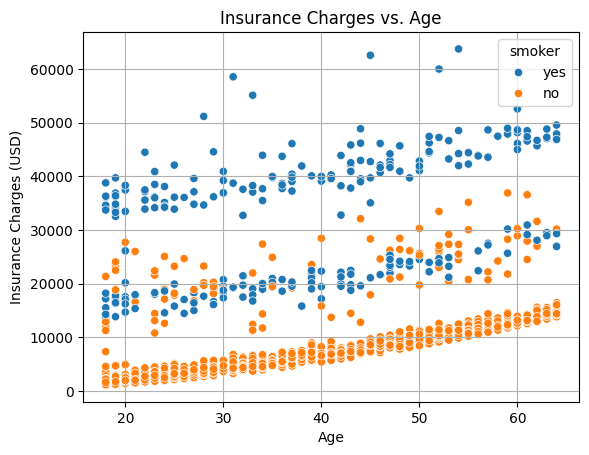

In [ ]:
import pandas as pd
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Load dataset
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
df = pd.read_csv(url)

# Plot data
sns.scatterplot(df, x='age', y='charges', hue='smoker')
plt.xlabel("Age")
plt.ylabel("Insurance Charges (USD)")
plt.title("Insurance Charges vs. Age")
plt.grid(True)
plt.show()

In [ ]:
# TODO: filter the dataset to only include non-smokers
df = df[df.smoker == "no"]

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

# Select input and target
X_train = df_train[["age"]]
y_train = df_train[["charges"]]
X_test = df_test[["age"]]
y_test = df_test[["charges"]]

# Normalize features
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)

# Normalize target
target_scaler = StandardScaler()
y_train = target_scaler.fit_transform(y_train)
y_test = target_scaler.transform(y_test)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

torch.Size([851, 1])
torch.Size([851, 1])
torch.Size([213, 1])
torch.Size([213, 1])


In [ ]:
from torch import nn, optim

# TODO: Define a simple feedforward neural network with a non-linear activation function
model = nn.Sequential(
    nn.Linear(1, 64),  # Input layer with 1 feature
    nn.ReLU(),         # Activation function
    nn.Linear(64, 1)   # Output layer with 1 output
)

# TODO: Define loss function (MSE) and optimizer (SGD) with a learning rate of 0.001
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# Training loop
for epoch in range(1000):
    # Forward pass
    outputs = model(X_train)

    # TODO: Compute the loss
    loss = criterion(outputs, y_train)

    # Set gradients to zero
    optimizer.zero_grad()


    # TODO: Perform a backward pass and an optimization step
    loss.backward()
    optimizer.step()

    # Print loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/1000], Loss: {loss.item():.4f}")

Epoch [100/1000], Loss: 0.6280
Epoch [200/1000], Loss: 0.6094
Epoch [300/1000], Loss: 0.6084
Epoch [400/1000], Loss: 0.6083
Epoch [500/1000], Loss: 0.6083
Epoch [600/1000], Loss: 0.6083
Epoch [700/1000], Loss: 0.6083
Epoch [800/1000], Loss: 0.6083
Epoch [900/1000], Loss: 0.6082
Epoch [1000/1000], Loss: 0.6082


In [ ]:
# Evaluate the model on the test set
with torch.no_grad():
    # TODO: Make predictions on the test set and compute the loss
    test_outputs = model(X_test)
    test_loss = criterion(test_outputs, y_test)
    print(f"Test Loss: {test_loss.item():.4f}")

Test Loss: 0.5477


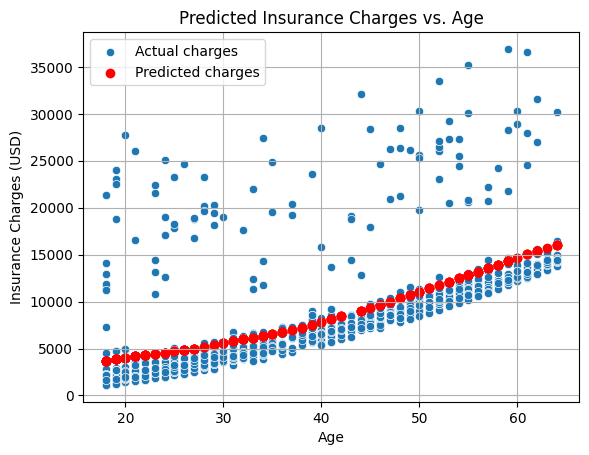

In [ ]:
features = feature_scaler.inverse_transform(X_test.numpy())
predictions = target_scaler.inverse_transform(test_outputs.numpy())

# TODO: Plot the predictions against the actual values
sns.scatterplot(df, x="age", y="charges", label="Actual charges")
plt.scatter(features, predictions, color="red", label="Predicted charges")
plt.xlabel("Age")
plt.ylabel("Insurance Charges (USD)")
plt.title("Predicted Insurance Charges vs. Age")
plt.legend()
plt.grid(True)
plt.show()